<a href="https://colab.research.google.com/github/goulartsursula/disciplinas-uerj/blob/master/Estrutura%20da%20Materia%202/%20Interferometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

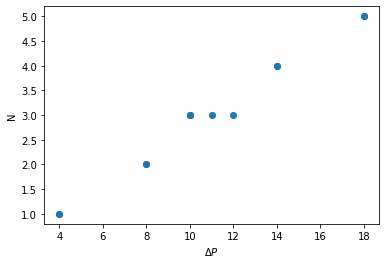

y = (0.28851174934725826 +- 0.012125732800444102)x +( -0.12924281984333996 +- 0.14128910455238902)


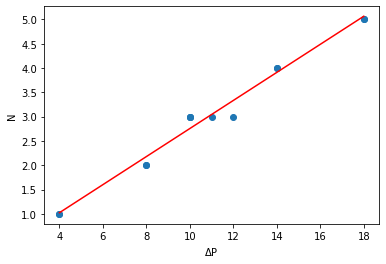

(1.0002312556309834, 9.719340707086636e-06)


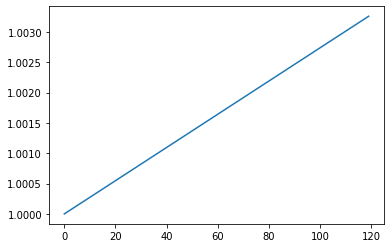

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Dados_VelocidadeDaLuz.dat', sep='\s+')
data['DeltaP'] = data['Pf'] - data['Pi']

#Gráfico DeltaP x N

plt.scatter(data['DeltaP'], data['N'])
plt.xlabel('$\Delta P$')
plt.ylabel('N')

plt.show()

x = data['DeltaP']
y = data['N']

#Ajuste Linear

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

#Gráfico do Ajuste Linear

x = np.arange(data['DeltaP'].values.min(), data['DeltaP'].values.max()+1)
y = parametros[2] + parametros[0] * x

plt.scatter(data['DeltaP'], data['N'])
plt.plot(x, y, color='red')
plt.ylabel('N')
plt.xlabel('$\Delta$P')

plt.show()
data.head(13)

#Definindo constantes

lamb = 632.8e-7
m = parametros[0]
d = 3

# Gráfico n x P: Mostrar que a relação entre n e P é uma relação linear
P = np.arange(0, 120)
n = m * lamb * P / 2 * d + 1

plt.plot(P, n)

# Índice de refração do ar
n_ar = (m*lamb*76 / (2*d) + 1, parametros[1]*lamb*76 / (2*d))
print(n_ar)